# Multi-Linear Regression on Dummy data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Generate a sample dataset (you would typically load your own dataset)
data = {'X1': [1, 2, 3, 4, 5],
        'X2': [2, 3, 4, 5, 6],
        'Y': [30, 5, 70, 9, 11]}

df = pd.DataFrame(data)

# Split the data into independent variables (X) and the dependent variable (Y)
X_indep = df[['X1', 'X2']]
Y_dep = df['Y']

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_indep, Y_dep, test_size=0.2, random_state=12)

In [4]:
# Create a linear regression model
model = LinearRegression()

In [5]:
# Fit the model to the training data
model.fit(X_train, Y_train)

LinearRegression()

In [6]:
# Make predictions on the test set
Y_pred = model.predict(X_test)

In [7]:
# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-2.15 -2.15]
Intercept: 40.95


<h1 style=fontsize:1000> Multi-Linear Regression on Insurance data</h1> 
<br>
<ul>
    <li>Exploratory data analysis (EDA)</li>
    <li>Feature engineering</li>
    <li> Feature Selection</li>
    <li> Model Building and validation </li>
 <ul>
   
    

In [8]:
from sklearn.linear_model import LinearRegression
#from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
i = pd.read_csv('insurance.csv')
i.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h2> Exploratory data analysis (EDA) <h2>   

In [10]:
i.isnull().sum() #impute mean or median or mode

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
#Categorical data is the statistical data comprising categorical variables of data that are converted into categories.
i.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
cat = i.select_dtypes(exclude = ['int',float])
print(cat.columns)

Index(['sex', 'smoker', 'region'], dtype='object')


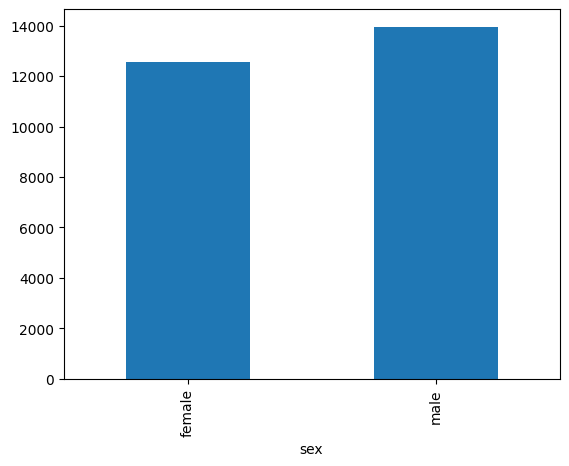

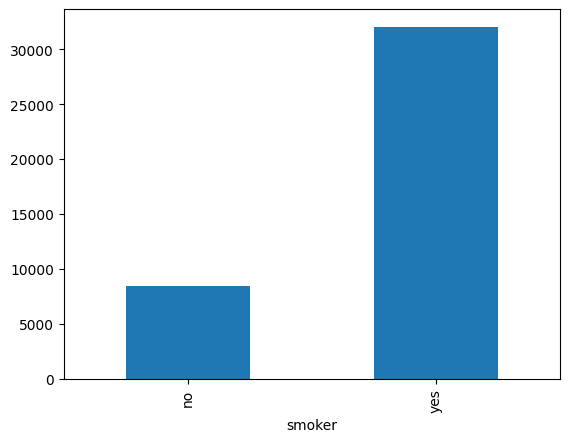

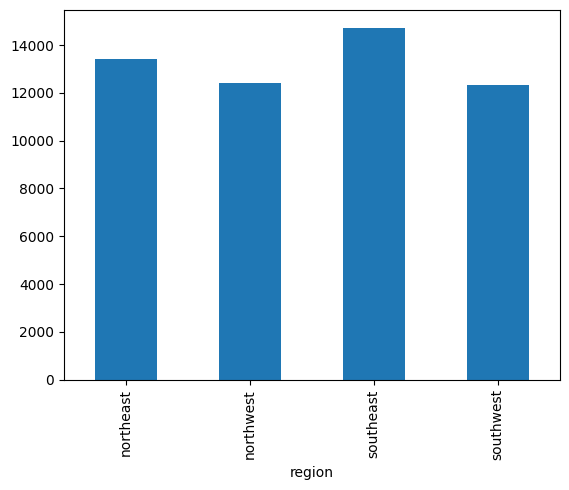

In [13]:
for k in cat:
    if k != 'charges':
        i.groupby([k])['charges'].mean().plot.bar()
        plt.show()

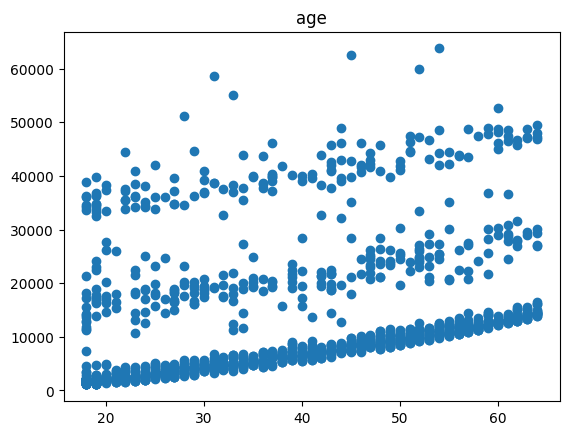

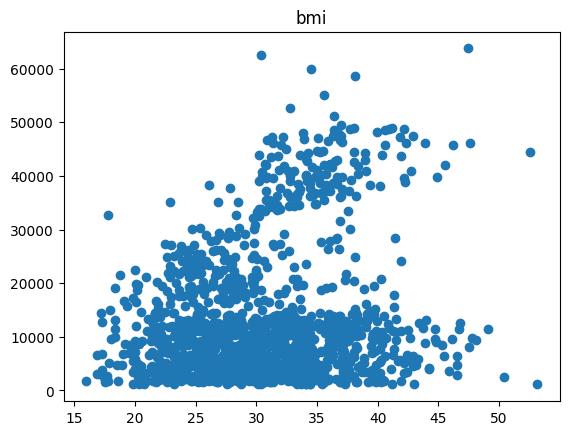

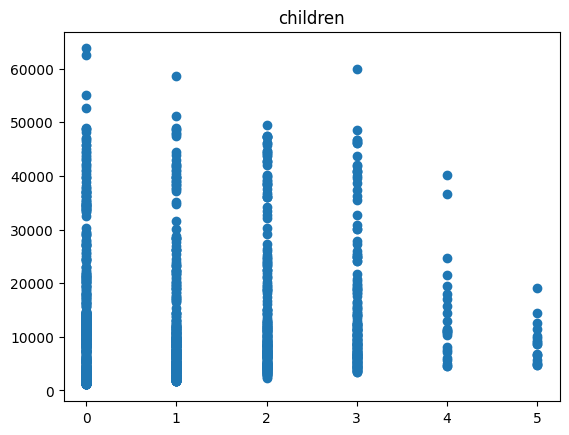

In [14]:
num = i.select_dtypes(exclude = ['object'])
for k in num:
    if k != 'charges':
        plt.scatter(i[k],i['charges'])
        plt.title(k)
        plt.show()

<h5> <b> Distribution of data </b> </h5>

c:\Users\Hamza\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


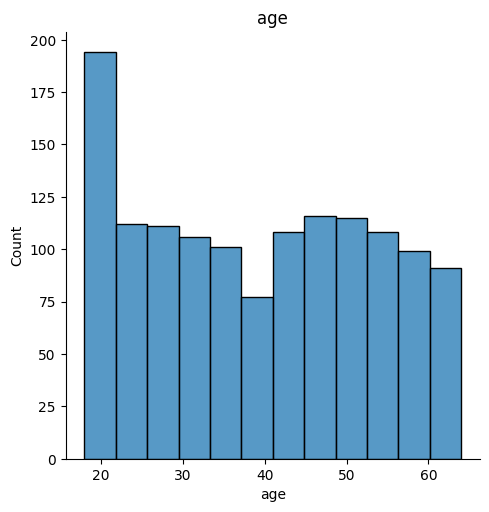

c:\Users\Hamza\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


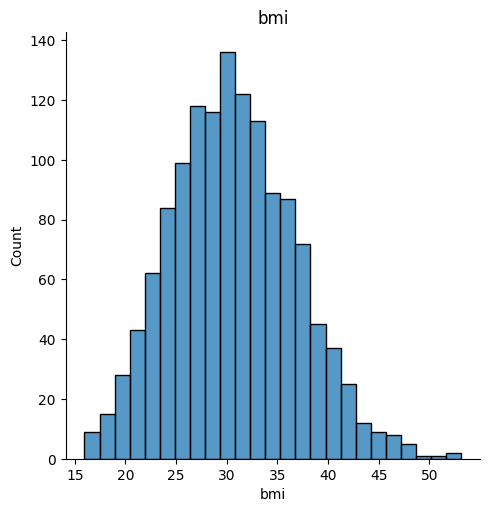

c:\Users\Hamza\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


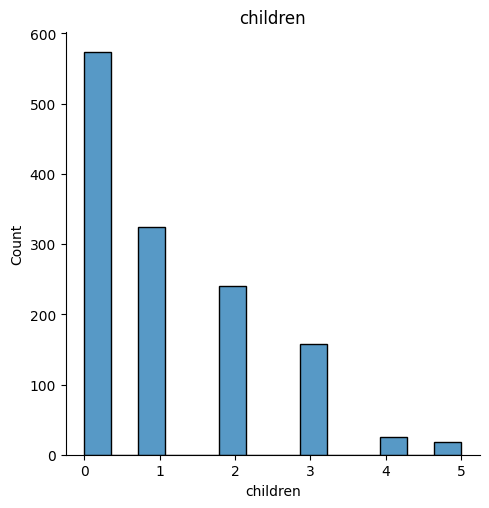

In [34]:
#linear regression assumes that the input data is symertically distributed
for k in num:
    if k != 'charges':
        sns.displot(i[k])
        plt.title(k)
        plt.show()

c:\Users\Hamza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


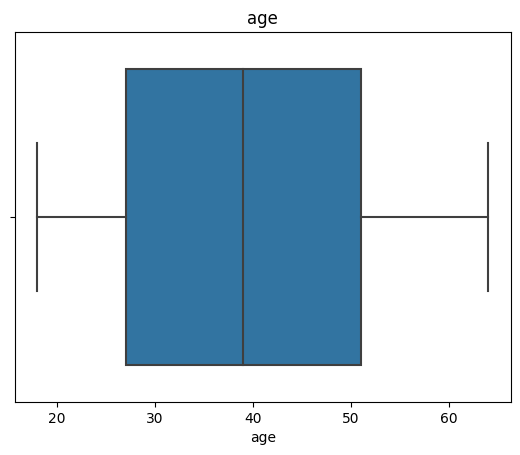

c:\Users\Hamza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


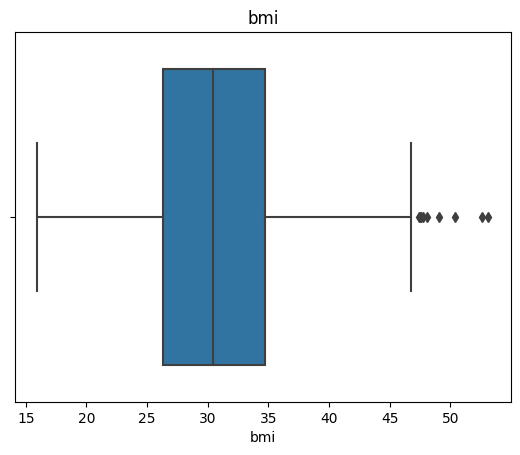

c:\Users\Hamza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


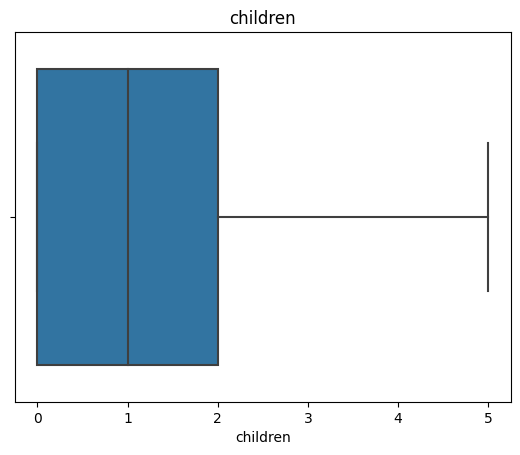

In [16]:
for k in num:
    if k != 'charges':
        sns.boxplot(i[k])
        plt.title(k)
        plt.show()

<h1> Feature engineering <h1>

In [17]:
#label encoding for  catagorical data [sex,smoker,region]
#feature scaling ( normalising the data and handle outliers)

i[cat.columns].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [18]:
ins  = i.copy()
ins['sex'] = np.where(ins['sex']=='male',1,0)
ins['smoker'] = np.where(ins['smoker']=='yes',1,0)
ordinal = {k:i for i,k in enumerate(ins['region'].unique(),0)}
ins['region'] = ins['region'].map(ordinal)
ins[cat.columns].head()

,sex,smoker,region
0,0,1,0
1,1,0,1
2,1,0,1
3,1,0,2
4,1,0,2


In [19]:
ins['region'].unique()

array([0, 1, 2, 3], dtype=int64)

In [20]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


<h1> Feature Selection </h1>

In [21]:
from sklearn.feature_selection import chi2 #cat and cont

In [22]:
feat_cat = ins.drop(num.columns,axis=1)
feat_cat['children'] = ins['children'].values
y = ins['charges'].astype('int')
feat_cat.head()

,sex,smoker,region,children
0,0,1,0,0
1,1,0,1,1
2,1,0,1,3
3,1,0,2,0
4,1,0,2,0


In [23]:
chi = chi2(feat_cat,y)
chi
#chi2  returns 2 values fscore and p_value

(array([ 655.07248521, 1059.11678832, 1066.60725076, 1752.13651877]),
 array([1.00000000e+00, 9.99998656e-01, 9.99996987e-01, 3.77773444e-17]))

In [24]:
p_values = pd.Series(chi[1])
p_values.index = feat_cat.columns
p_values

sex         1.000000e+00
smoker      9.999987e-01
region      9.999970e-01
children    3.777734e-17
dtype: float64

In [25]:
feat_num = ins[num.columns]
feat_num.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [26]:
feat_num.drop('children',axis=1).corr()

,age,bmi,charges
age,1.000000,0.109272,0.299008
bmi,0.109272,1.000000,0.198341
charges,0.299008,0.198341,1.000000


In [27]:
f_ins = ins[['age','smoker','children','region','charges']]
f_ins.head()

,age,smoker,children,region,charges
0,19,1,0,0,16884.92400
1,18,0,1,1,1725.55230
2,28,0,3,1,4449.46200
3,33,0,0,2,21984.47061
4,32,0,0,2,3866.85520


<h1> Model Building and Validation </h1>

In [28]:
from sklearn.model_selection import train_test_split

x = f_ins.drop(['charges'],axis=1)
y = f_ins['charges']

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=12)

In [30]:
#from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
from sklearn.metrics import r2_score
Y_pred = lr.predict(x_test)
r2_score(y_test,Y_pred)

0.6867573622623184

In [32]:
# Print the coefficients and intercept
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

Coefficients: [  278.88317783 23875.99513035   450.60657      -48.69513134]
Intercept: -2964.7034225540556


In [33]:
output = pd.DataFrame({'actual_charges':y_test,'predicted_charges':Y_pred})
output.head()

,actual_charges,predicted_charges
936,32108.66282,10061.284148
728,2217.60120,1909.108384
1307,21472.47880,31540.589416
924,6250.43500,9027.273224
137,2045.68525,3073.336227
